In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline

zf= 0.44019138755980863
xd= 0.9744485695566717
xb= 0.02350536535513541
Mw_feed= 85.83732057416269
F (kmol/h)= 349.4983277591973
D (kgmol/h)= 153.4
D (kgmol/h)= 196.6


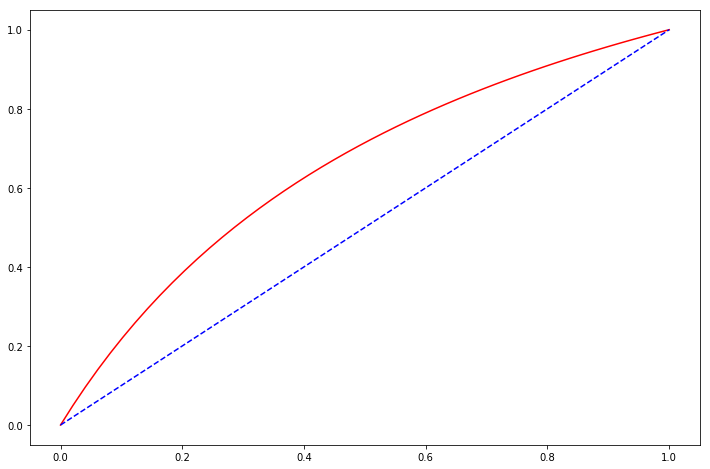

In [45]:
xd_wt=0.97  #benzene wt
xb_wt=0.02  #benzene wt
zf_wt=0.4   #benzene wt
F_wt=30000  #kg/hr

Mw_bz=78   #m.w benzene
Mw_tl=92   #m.w toluene

# to mole fraction:

zf=(zf_wt/Mw_bz)/((zf_wt/Mw_bz)+((1-zf_wt)/Mw_tl))
xd=(xd_wt/Mw_bz)/((xd_wt/Mw_bz)+((1-xd_wt)/Mw_tl))
xb=(xb_wt/Mw_bz)/((xb_wt/Mw_bz)+((1-xb_wt)/Mw_tl))

print("zf=",zf)
print("xd=",xd)
print("xb=",xb)

#The avg molecular wt of the feed:

Mw_F=1/(zf_wt/Mw_bz+(1-zf_wt)/Mw_tl)

print("Mw_feed=",Mw_F)

F=F_wt/Mw_F

print("F (kmol/h)=",F)

#Balance:

#F=W+D
#zf*F=W*xb+D*xd

print("D (kgmol/h)=",153.4)
print("D (kgmol/h)=",196.6)


q=1 #boiling point
small=1e-5 #avoid having zero in division 


#molecular weight of benzene and toluene are equal, then the mass fraction and molar fraction are equal (nearly)

# Équilibre mélange idéal
#
def y_45(x):   #y=x#

    return x

def y_e(x):    #equilibrium curve#
    alpha=2.5  #need to be checked (1-chemsep, 2-interpolation) 
    return alpha*x/(1+(alpha-1)*x)



def y_q(x):   #feed line


    return q/(q-1+small)*x-zf/(q-1+small)

# 0.9 et 0.1 comme fractions du produit au haut et au bas de la colonne


x = np.linspace(0,1)
# Tracer
plt.figure(figsize = (12,8))
plt.plot(x,y_e(x),'r');
plt.plot(x,y_45(x),'b--');


[ 0.44019802]
[ 0.66283022]
Rmin= [ 1.39970025]


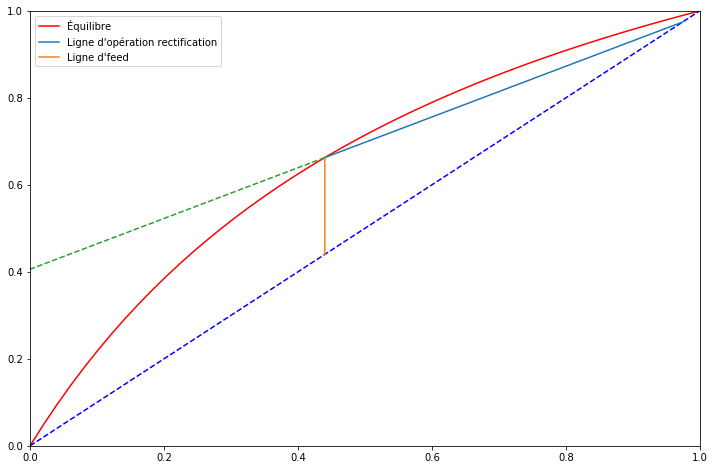

In [46]:

y2_e = lambda x: y_e(x)-y_q(x)  #to find (x-coordinate) for 2nd point of the rectification line for Rmin


x2=fsolve(y2_e, 0.1)      #x-coordinate for 2nd point of the rectification line for Rmin
print(x2)

print(y_e(x2))


def y_rmin(x):    #rectifying in Rmin

    return (y_e(x2)-y_45(xd))/(x2-xd)*(x-x2)+y_e(x2)

print("Rmin=",xd/y_rmin(0)-1)

plt.figure(figsize = (12,8))
plt.plot(x,y_e(x),'r',label='Équilibre')

plt.plot(x,y_45(x),'b--');
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'opération rectification");
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'feed");
plt.plot([x2,0],[y_e(x2),y_rmin(0)],'--'); 
plt.ylim(0,1)
plt.xlim(0,1)

plt.legend();


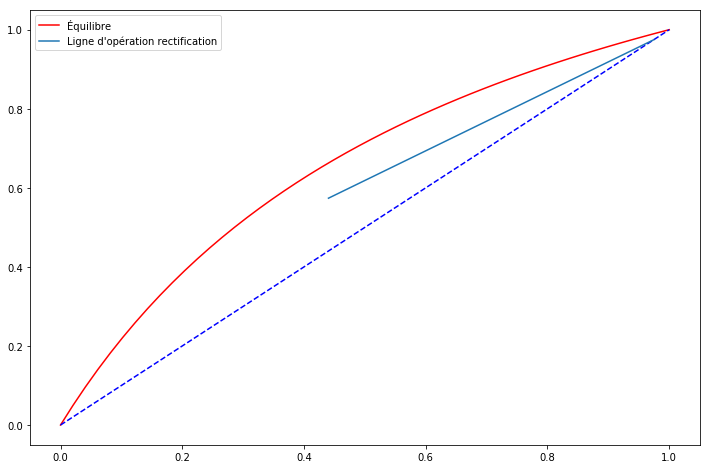

In [48]:
def y_r(x):    #rectifying 
    
    R=3
    #R=200   #for Nmin
    return (R/(R+1))*x+1/(R+1)*xd

y2_r = lambda x: y_r(x)-y_q(x)  #to find (x-coordinate) for 2nd point of the rectification line 

x2=fsolve(y2_r, 0.1)      #x-coordinate for 2nd point of the rectification line


plt.figure(figsize = (12,8))
plt.plot(x,y_e(x),'r',label='Équilibre')

plt.plot(x,y_45(x),'b--');
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'opération rectification");     
plt.legend();

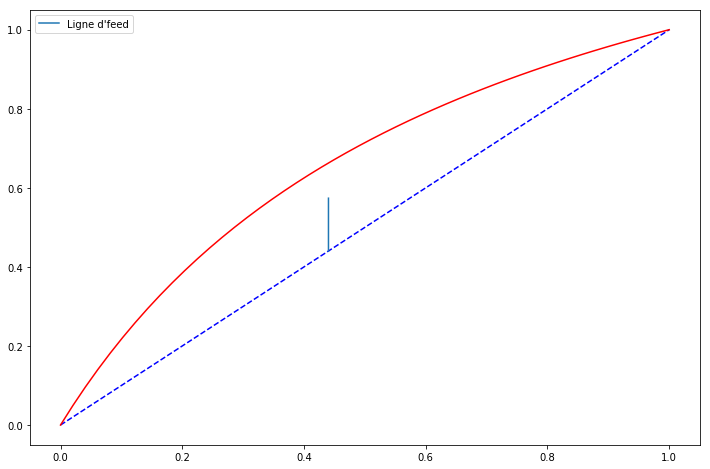

In [49]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'feed");    
plt.legend();

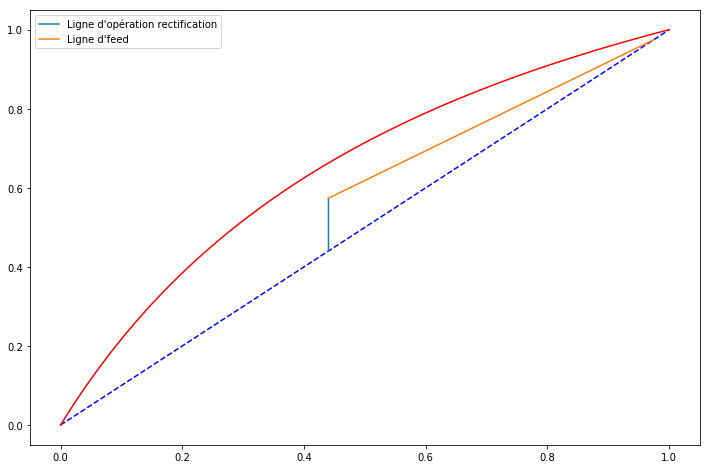

In [50]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.legend();

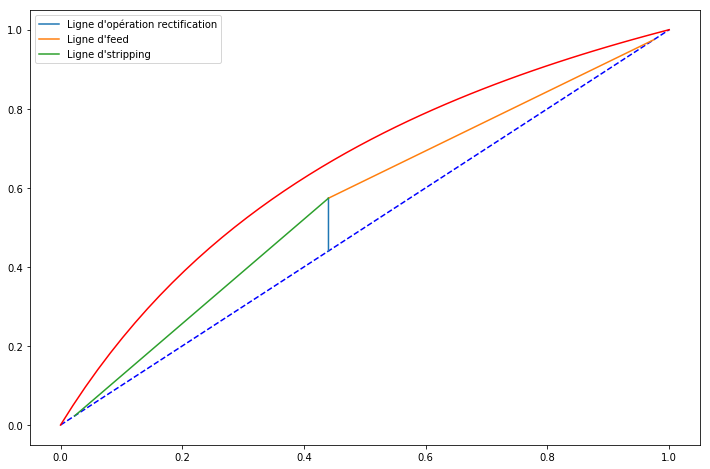

In [51]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.plot([xb,x2],[y_45(xb),y_q(x2)],label="Ligne d'stripping");  
plt.legend();

def y_stripping(x):
    m=(y_45(xb)-y_q(x2))/(xb-x2)
    return m*(x-xb)+y_45(xb)

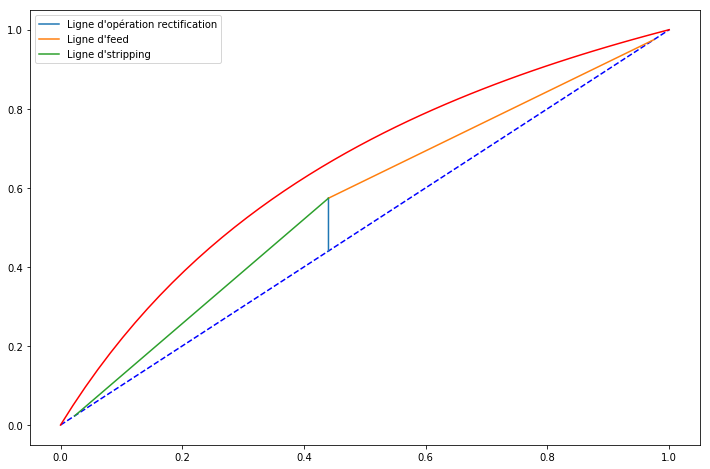

In [52]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.plot([xb,x2],[y_45(xb),y_stripping(x2)],label="Ligne d'stripping");  
plt.legend();



12


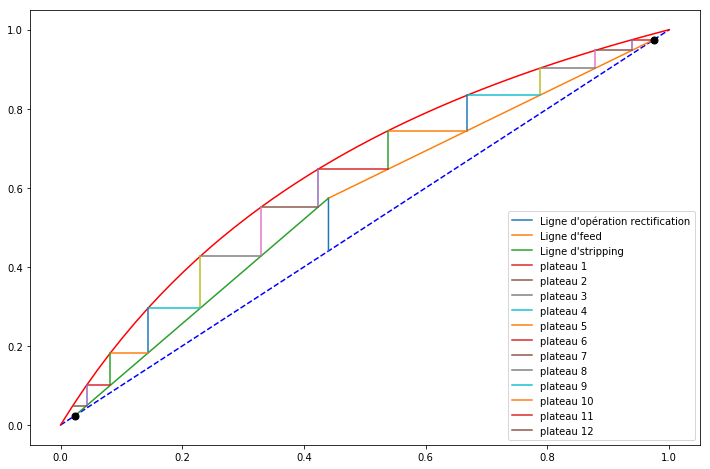

In [53]:
plt.figure(figsize = (12,8))
plt.plot(x,y_45(x),'b--');
plt.plot(x,y_e(x),'r');
plt.plot([zf,x2],[y_45(zf),y_q(x2)],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.plot([xd,x2],[y_45(xd),y_q(x2)],label="Ligne d'feed");  
plt.plot([xb,x2],[y_45(xb),y_q(x2)],label="Ligne d'stripping");  
plt.legend();

#initialization 
x_1=xd
y_1=y_r(xd)
x_3=xd
y_3=xd

nTray = 0


        
while x_3 > xb:
    
    nTray += 1

    y2_r = lambda x: y_e(x)-y_r(x_1)
    x_2=fsolve(y2_r, 0.0005)
    y_2=y_e(x_2)
    
    if (x_1<x2):
        
        y2_r = lambda x: y_e(x)-y_stripping(x_1)
        x_2=fsolve(y2_r, 0.0005)
        y_2=y_e(x_2)

    x_3=x_2
    y_3=y_r(x_2)
    
    if (x_2<x2):
        
        x_3=x_2
        y_3=y_stripping(x_2)
        
    plt.plot([x_1,x_2],[y_1,y_2],label="plateau "+str(nTray))
    
    if (x_3>xb):
        plt.plot([x_2,x_3],[y_2,y_3])
    
    x_1=x_3
    y_1=y_3   
plt.legend();
plt.plot(xd,y_45(xd),'ko',ms=7)
plt.plot(xb,y_45(xb),'ko',ms=7)

print(nTray)
